In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("auto-mpg.csv")

In [18]:
toyota_corona_mark_ii_features = df[df['car name'] == 'toyota corona mark ii'].select_dtypes(include=np.number).dropna().iloc[0]
other_cars = df[df['car name'] != 'toyota corona mark ii'].select_dtypes(include=np.number).dropna()

dot_products = other_cars.apply(lambda row: np.dot(row, toyota_corona_mark_ii_features), axis=1)
most_similar_cars_indices = dot_products.nlargest(5).index
most_similar_cars = df.loc[most_similar_cars_indices][['car name']]

print("Top 5 similar cars to 'toyota corona mark ii' based on dot product:")
most_similar_cars

Top 5 similar cars to 'toyota corona mark ii' based on dot product:


,car name
44,pontiac safari (sw)
103,chevrolet impala
42,dodge monaco (sw)
95,buick electra 225 custom
90,mercury marquis brougham


In [15]:
toyota_corona_mark_ii_features = df[df['car name'] == 'toyota corona mark ii'].select_dtypes(include=np.number).dropna().iloc[0]
other_cars = df[df['car name'] != 'toyota corona mark ii'].select_dtypes(include=np.number).dropna()

def cosine_similarity(vec1, vec2):
  dot_product = np.dot(vec1, vec2)
  norm_vec1 = np.linalg.norm(vec1)
  norm_vec2 = np.linalg.norm(vec2)
  if norm_vec1 == 0 or norm_vec2 == 0:
    return 0
  return dot_product / (norm_vec1 * norm_vec2)

similarities = other_cars.apply(lambda row: cosine_similarity(row, toyota_corona_mark_ii_features), axis=1)

least_similar_car_index = similarities.nsmallest(1).index[0]
least_similar_car = df.loc[least_similar_car_index][['car name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]

print("Car most orthogonal to 'toyota corona mark ii' based on cosine similarity:")
least_similar_car

Car most orthogonal to 'toyota corona mark ii' based on cosine similarity:


,13
car name,buick estate wagon (sw)
mpg,14.0
cylinders,8
displacement,455.0
horsepower,225
weight,3086
acceleration,10.0
model year,70
origin,1


Original data shape: (398, 7)
Projected data shape (2D): (398, 2)
Target variable 'y' not found. Scatter plot will not be colored by target.


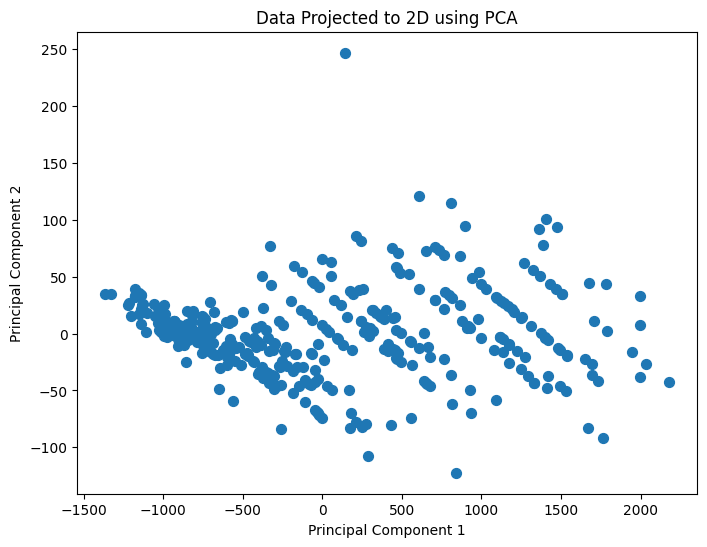

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

X = df.select_dtypes(include=np.number).dropna()

X_2d = pca.fit_transform(X)

print("Original data shape:", X.shape)
print("Projected data shape (2D):", X_2d.shape)

if 'y' in globals():
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', s=50)
    plt.title("Data Projected to 2D using PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label='Target')
    plt.show()
else:
    print("Target variable 'y' not found. Scatter plot will not be colored by target.")
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], s=50)
    plt.title("Data Projected to 2D using PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()